# Intertemporal Choice

We setup and solve a very simple generic one-period consumer choice problem over two goods.  We later specialize to the case of intertemporal trade over two periods and choice over lotteries.  The consumer is assumed to have time-consistent preofereces.  Later, in a separate notebook, we look at a a three period model where consumers have time-inconsistent (quasi-hyperbolic) preferences.

The code to generate the static and interactive figures is hidden but can be revealed below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [2]:
def U(c1, c2, alpha):
    return (c1**alpha)*(c2**(1-alpha))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def indif(c1, ubar, alpha):
    return (ubar/(c1**alpha))**(1/(1-alpha))

In [3]:
def find_opt(p1,p2,I,alpha):
    c1 = alpha * I/p1
    c2 = (1-alpha)*I/p2
    u = U(c1,c2,alpha)
    return c1, c2, u

In [4]:
alpha = 0.5
p1, p2 = 1, 1
I = 100

pmin, pmax = 1, 4
Imin, Imax = 10, 200
cmax = (3/4)*Imax/pmin

In [5]:
def consume_plot(p1=p1, p2=p2, I=I, alpha=alpha):
    
    c1 = np.linspace(0.1,cmax,num=100)
    c1e, c2e, uebar = find_opt(p1, p2 ,I, alpha)
    idfc = indif(c1, uebar, alpha)
    budg = budgetc(c1, p1, p2, I)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(c1, budg, lw=2.5)
    ax.plot(c1, idfc, lw=2.5)
    ax.vlines(c1e,0,c2e, linestyles="dashed")
    ax.hlines(c2e,0,c1e, linestyles="dashed")
    ax.plot(c1e,c2e,'ob')
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

## Choice over two goods

A consumer chooses a consumption bundle to maximize Cobb-Douglas utility 

$$U(c_1,c_2) = c_1^\alpha c_2^{\beta}$$

subject to the budget constraint

$$p_1 c_1 + p_2 c_2 \leq I $$

To plot the budget constraint we rearrange to get:

$$c_2 = \frac{I}{p_2} - \frac{p_1}{p_2} c_1$$

Likewise, to draw the indifference curve defined by $u(c_1,c_2) = \bar u$ we solve for $c_2$ to get:

$$c_2 = \left( \frac{\bar u}{c_1^\alpha}\right)^\frac{1}{\beta}$$

For Cobb-Douglas utility the marginal rate of substitution (MRS) between $c_2$ and $c_1$ is:

$$MRS = \frac{U_1}{U_2} = \frac{\alpha}{\beta} \frac{c_2}{c_1}$$

where $U_1 =\frac{\partial U}{\partial c_1}$ and $U_2 =\frac{\partial U}{\partial c_2}$

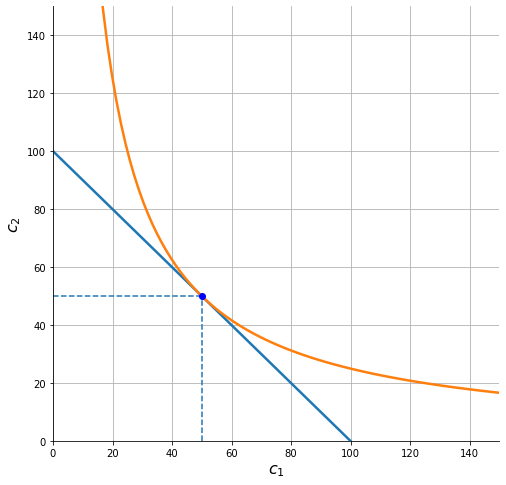

In [6]:
consume_plot()

## The consumer's optimum

$$L(c_1,c_2) = U(c_1,c_2) + \lambda (I - p_1 c_1  - p_2 c_2) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ U_1 = \lambda{p_1}$$

$$ U_2 = \lambda{p_2}$$

$$ I = p_1 c_1  + p_2 c_2$$

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$MRS = \frac{U_1}{U_2} =\frac{p_1}{p_2}$$

Using our earlier expression for the MRS of a Cobb-Douglas indifference curve, substituting this into the budget constraint and rearranging then allows us to solve for the **Marshallian demand functions**:

$$c_1(p_1,p_2,I)=\frac{\alpha}{\alpha+\beta} \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=\frac{\beta}{\alpha+\beta} \frac{I}{p_2}$$

Interactive plot with sliders (visible if if running on a notebook server):

In [7]:
interact(consume_plot,p1=(pmin,pmax,0.1),p2=(pmin,pmax,0.1), I=(Imin,Imax,10),alpha=(0.05,0.95,0.05));

interactive(children=(FloatSlider(value=1.0, description='p1', max=4.0, min=1.0), FloatSlider(value=1.0, descr…

## The expenditure function

The indirect utility function:

$$v(p_1,p_2,I) = u(c_1(p_1,p_2,I),c_2(p_1,p_2,I))$$


$$c_1(p_1,p_2,I)=\alpha \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=(1-\alpha)\frac{I}{p_2}$$

$$v(p_1,p_2,I) = I \cdot  \alpha^\alpha (1-\alpha)^{1-\alpha} \cdot 
\left [ \frac{p_2}{p_1} \right ]^\alpha \frac{1}{p_2} $$

$$E(p_z,p_2,\bar u) = \frac{\bar u}{\alpha^\alpha (1-\alpha)^{1-\alpha} \cdot 
\left [ \frac{p_2}{p_1} \right ]^\alpha \frac{1}{p_2}}$$

To minimize expenditure needed to achieve level of utility $\bar u$ we solve:

$$\min_{c_1,c_2} p_1 c_1 + p_2 c_2 $$

s.t.

$$u(c_1, c_2) =\bar u$$

The first order conditions are identical to those we got for the utility maximization problem, and hence we have the same tangency

$$\frac{U_1}{U_2} = \frac{\alpha}{1-\alpha} \frac{c_2}{c_1} = \frac{p_1}{p_2}$$

From this we can solve:   $$c_2 = \frac{p_1}{p_2} \frac{1-\alpha}{\alpha} c_1  $$

Now substitute this into the constraint to get:

$$ u \left ( c_1, \frac{p_1}{p_2} \frac{1-\alpha}{\alpha} c_1  \right )=\bar u$$

$$ u \left ( c_1, \frac{p_1}{p_2} \frac{1-\alpha}{\alpha} c_1  \right )=\bar u$$


## Intertemporal Consumption choices

We now look at the special case of intertemporal consumption, or consumption of the same good (say corn) over two periods.  As modeled below the consumer's income is now given by the market value of and endowment bundle $(y_1,y_2)$.

The variables $c_1$ and $c_2$ now refer to consumption of (say corn) in period 1 and period 2. 

As is typical of intertemporal maximization problems we will use a time-additive utility function.  The consumer who has access to a competitive financial market (they can borrow or save at interest rate $r$) maximizes:

$$U(c_1,c_2) = u(c_1) + \delta u(c_2)$$

subject to the intertemporal budget constraint:

$$ c_1 + \frac{c_2}{1+r}  = y_1 + \frac{y_2}{1+r} $$

This is just like an ordinary utility maximization problem with prices $p_1 = 1$ and $p_2 =\frac{1}{1+r}$.  Think of it this way, the price of corn is \$1 per unit in each period, but \$1 in period 1 can be placed into savings that will grow to $(1+r)$ dollars in period 2.  That means that from the standpoint of period 1 owning one unit of corn (or one dollar worth of corn) in period 2 is the equivalent of owning $\frac{1}{1+r}$ units of corn today (because placed in savings that amount of period 1 corn would grow to $\frac{1+r}{1+r} = 1$ units of corn in period 2).

The first order necessary condition for an interior optimum is:

$$u'(c_1^*) = \delta u'(c_2^*)$$

Let's adopt the widely used Constant-Relative Risk Aversion (CRRA) felicity function of the form:

$$
\begin{equation}
u\left(c_{t}\right)=\begin{cases}
\frac{c^{1-\rho}}{1-\rho}, & \text{if } \rho>0 \text{ and } \rho \neq 1 \\
ln\left(c\right) & \text{if } \rho=1
\end{cases}
\end{equation}
$$

The first order condition then becomes simply

$${c_1^*}^{-\rho} = \delta (1+r) {c_2^*}^{-\rho}$$

or 

$$c_2^* = \left [\delta (1+r) \right]^\frac{1}{\rho}c_1^* $$

From the binding budget constraint we also have

$$c_2^* = E[y](1+r)-c_1^*(1+r)$$

where $E[y] = y_1 + \frac{y_2}{1+r}$

Solving for $c_1^*$ (from the FOC and this binding budget):

$$c_1^*  = \frac{E[y]}{1+\frac{\left [\delta (1+r) \right]^\frac{1}{\rho}}{1+r}}$$

If we simplify to the simple case where $\delta =\frac{1}{1+r}$, where the consumer discounts future consumption at the same rate as the market interest rate then at an optimum the consumer will keep their consumption flat at $c_2^* = c_1^*$.  If we specialize further and assume that $r=0$ then the consumer will set  $c_2^* = c_1^* =\frac{y_1+y_2}{2}$

## Saving and borrowing visualized

Let us visualize the situation.  The consumer has CRRA preferences as described above (summarized by parameters $\delta$ and $\rho$ and starts with an income endowment $(y_1, y_2)$. The market cost of funds is $r$.  

### A savings case
In the diagram below the consumer is seen to be saving, i.e.  $s_1^* = y_1 - c_1^* >0$.

In [ ]:
consume_plot2(r, delta, rho, y1, y2)

In [9]:
def u(c, rho):
    return (1/rho)* c**(1-rho)

def U2(c1, c2, rho, delta):
    return u(c1, rho) + delta*u(c2, rho)

def budget2(c1, r, y1, y2):
    Ey = y1 + y2/(1+r)
    return Ey*(1+r) - c1*(1+r)

def indif2(c1, ubar, rho, delta):
    return  ( ((1-rho)/delta)*(ubar - u(c1, rho)) )**(1/(1-rho))

In [10]:
def find_opt2(r, rho, delta, y1, y2):
    Ey = y1 + y2/(1+r)
    A = (delta*(1+r))**(1/rho)
    c1 = Ey/(1+A/(1+r))
    c2 = c1*A
    u = U2(c1, c2, rho, delta)
    return c1, c2, u

Parameters for default plot:

In [11]:
rho = 0.5
delta = 1
r = 0
y1, y2 = 80, 20

rmin, rmax = 0, 1
cmax = 150

In [12]:
def consume_plot2(r, delta, rho, y1, y2):
    
    c1 = np.linspace(0.1,cmax,num=100)
    c1e, c2e, uebar = find_opt2(r, rho, delta, y1, y2)
    idfc = indif2(c1, uebar, rho, delta)
    budg = budget2(c1,  r, y1, y2)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(c1, budg, lw=2.5)
    ax.plot(c1, idfc, lw=2.5)
    ax.vlines(c1e,0,c2e, linestyles="dashed")
    ax.hlines(c2e,0,c1e, linestyles="dashed")
    ax.plot(c1e,c2e,'ob')
    ax.vlines(y1,0,y2, linestyles="dashed")
    ax.hlines(y2,0,y1, linestyles="dashed")
    ax.plot(y1,y2,'ob')
    ax.text(y1-6,y2-6,r'$y^*$',fontsize=16)
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

Interactive plot with sliders (visible if if running on a notebook server):

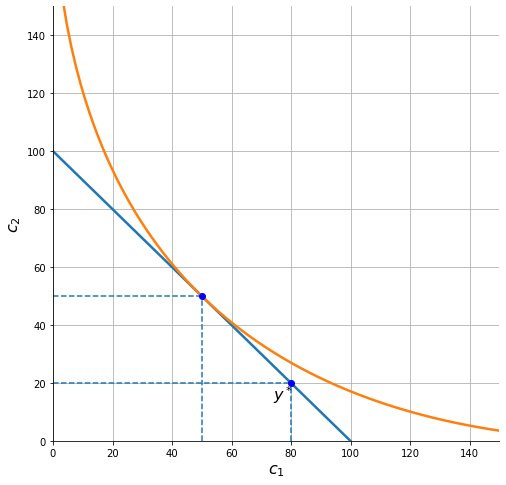

In [13]:
consume_plot2(r, delta, rho, y1, y2)

In [16]:
c1e, c2e, uebar = find_opt2(r, rho, delta, y1, y2)

In this particular case the consumer consumes:

In [19]:
c1e, c2e

(50.0, 50.0)

Her endowment is 

In [17]:
(y1, y2)

(80, 20)

In [ ]:
y1,y2

And she therefore in period 1 saves $y_1-c_1$

In [19]:
y1-c1e

30.0

### A borrowing case
In the diagram below the consumer is seen to be borrowing, i.e.  $s_1^* = y_1 - c_1^* <0$.

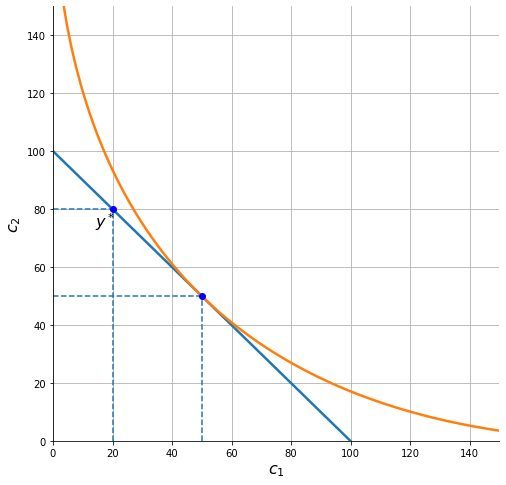

In [20]:
y1,y2 = 20,80
consume_plot2(r, delta, rho, y1, y2)

### Interactive plot

In [21]:
interact(consume_plot2, r=(rmin,rmax,0.1), rho=fixed(rho), delta=(0.5,1,0.1), y1=(10,100,1), y2=(10,100,1));

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0), FloatSlider(value=0.7, description='de…